In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
data = sm.datasets.fair.load_pandas().data

In [398]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [399]:
data.occupation.unique()

array([2., 3., 5., 4., 1., 6.])

In [400]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [402]:
# we need to convert affairs column into a binary column
data['affair'] = (data.affairs > 0).astype(int)
data['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [403]:
data['affairs'].value_counts(ascending = False)

0.000000     4313
1.400000      118
0.583333       86
1.333333       72
0.400000       72
             ... 
39.199982       1
6.260869        1
0.243478        1
38.399994       1
0.339394        1
Name: affairs, Length: 77, dtype: int64

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

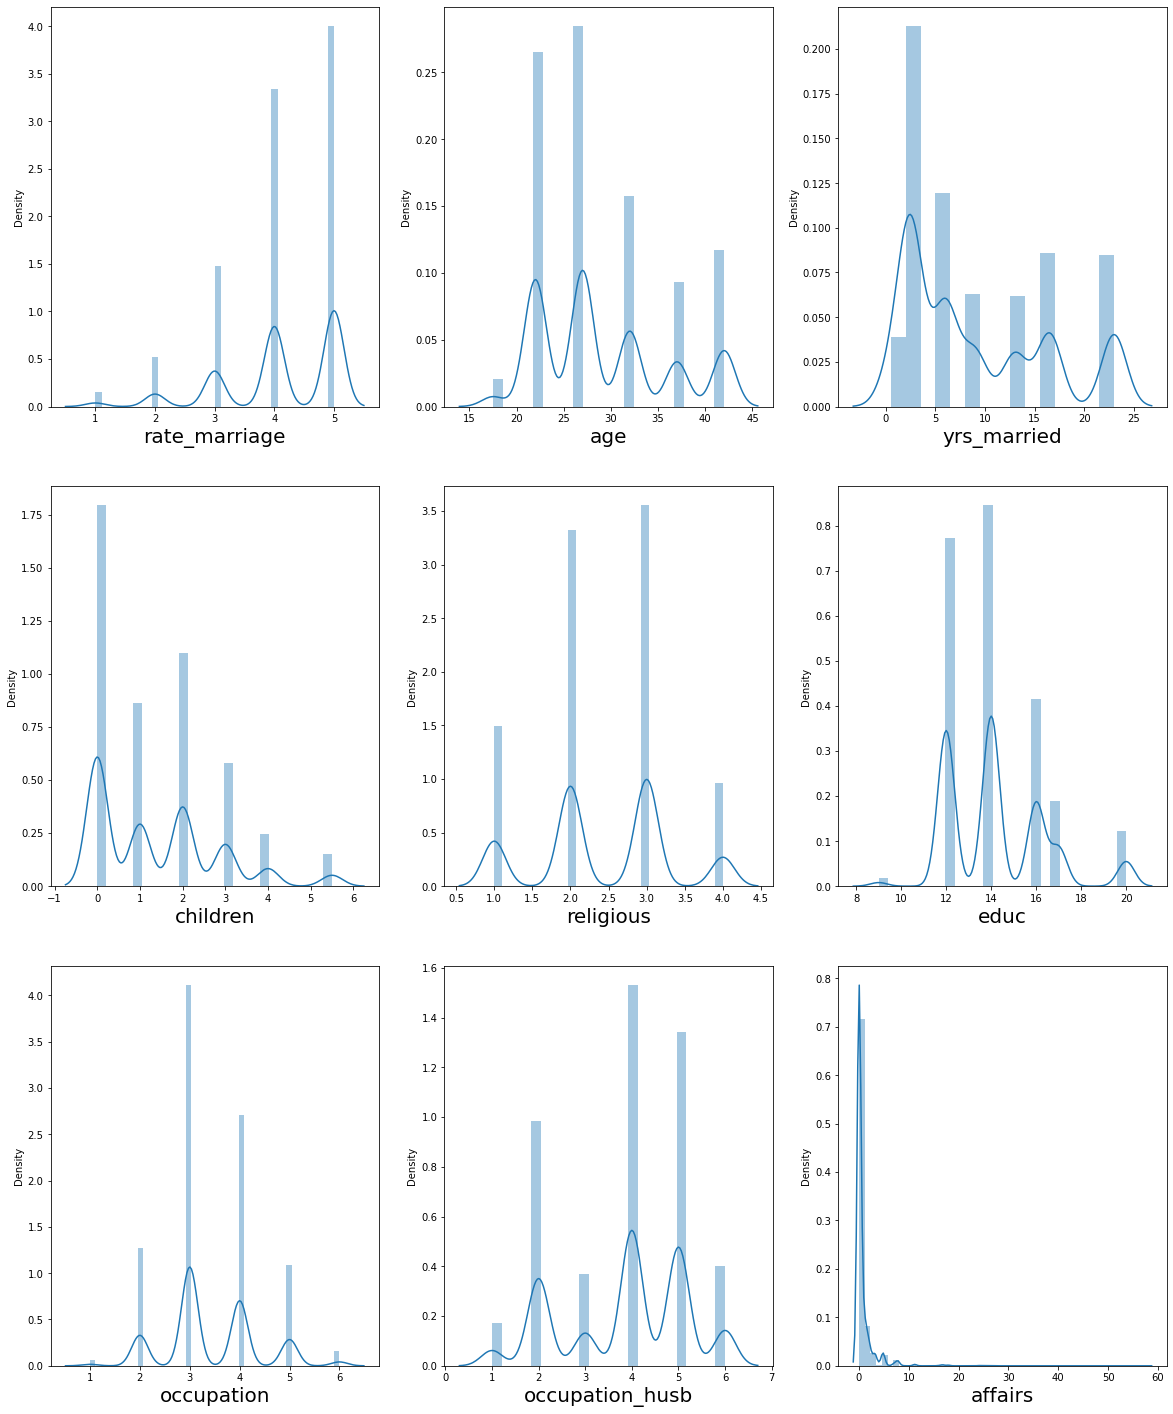

In [404]:
import warnings
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in data: 
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.show()

In [405]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',
data, return_type="dataframe")

In [406]:
# fix column names of X
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',

'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [407]:
# flatten y into a 1-D array
y = np.ravel(y)
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will resu

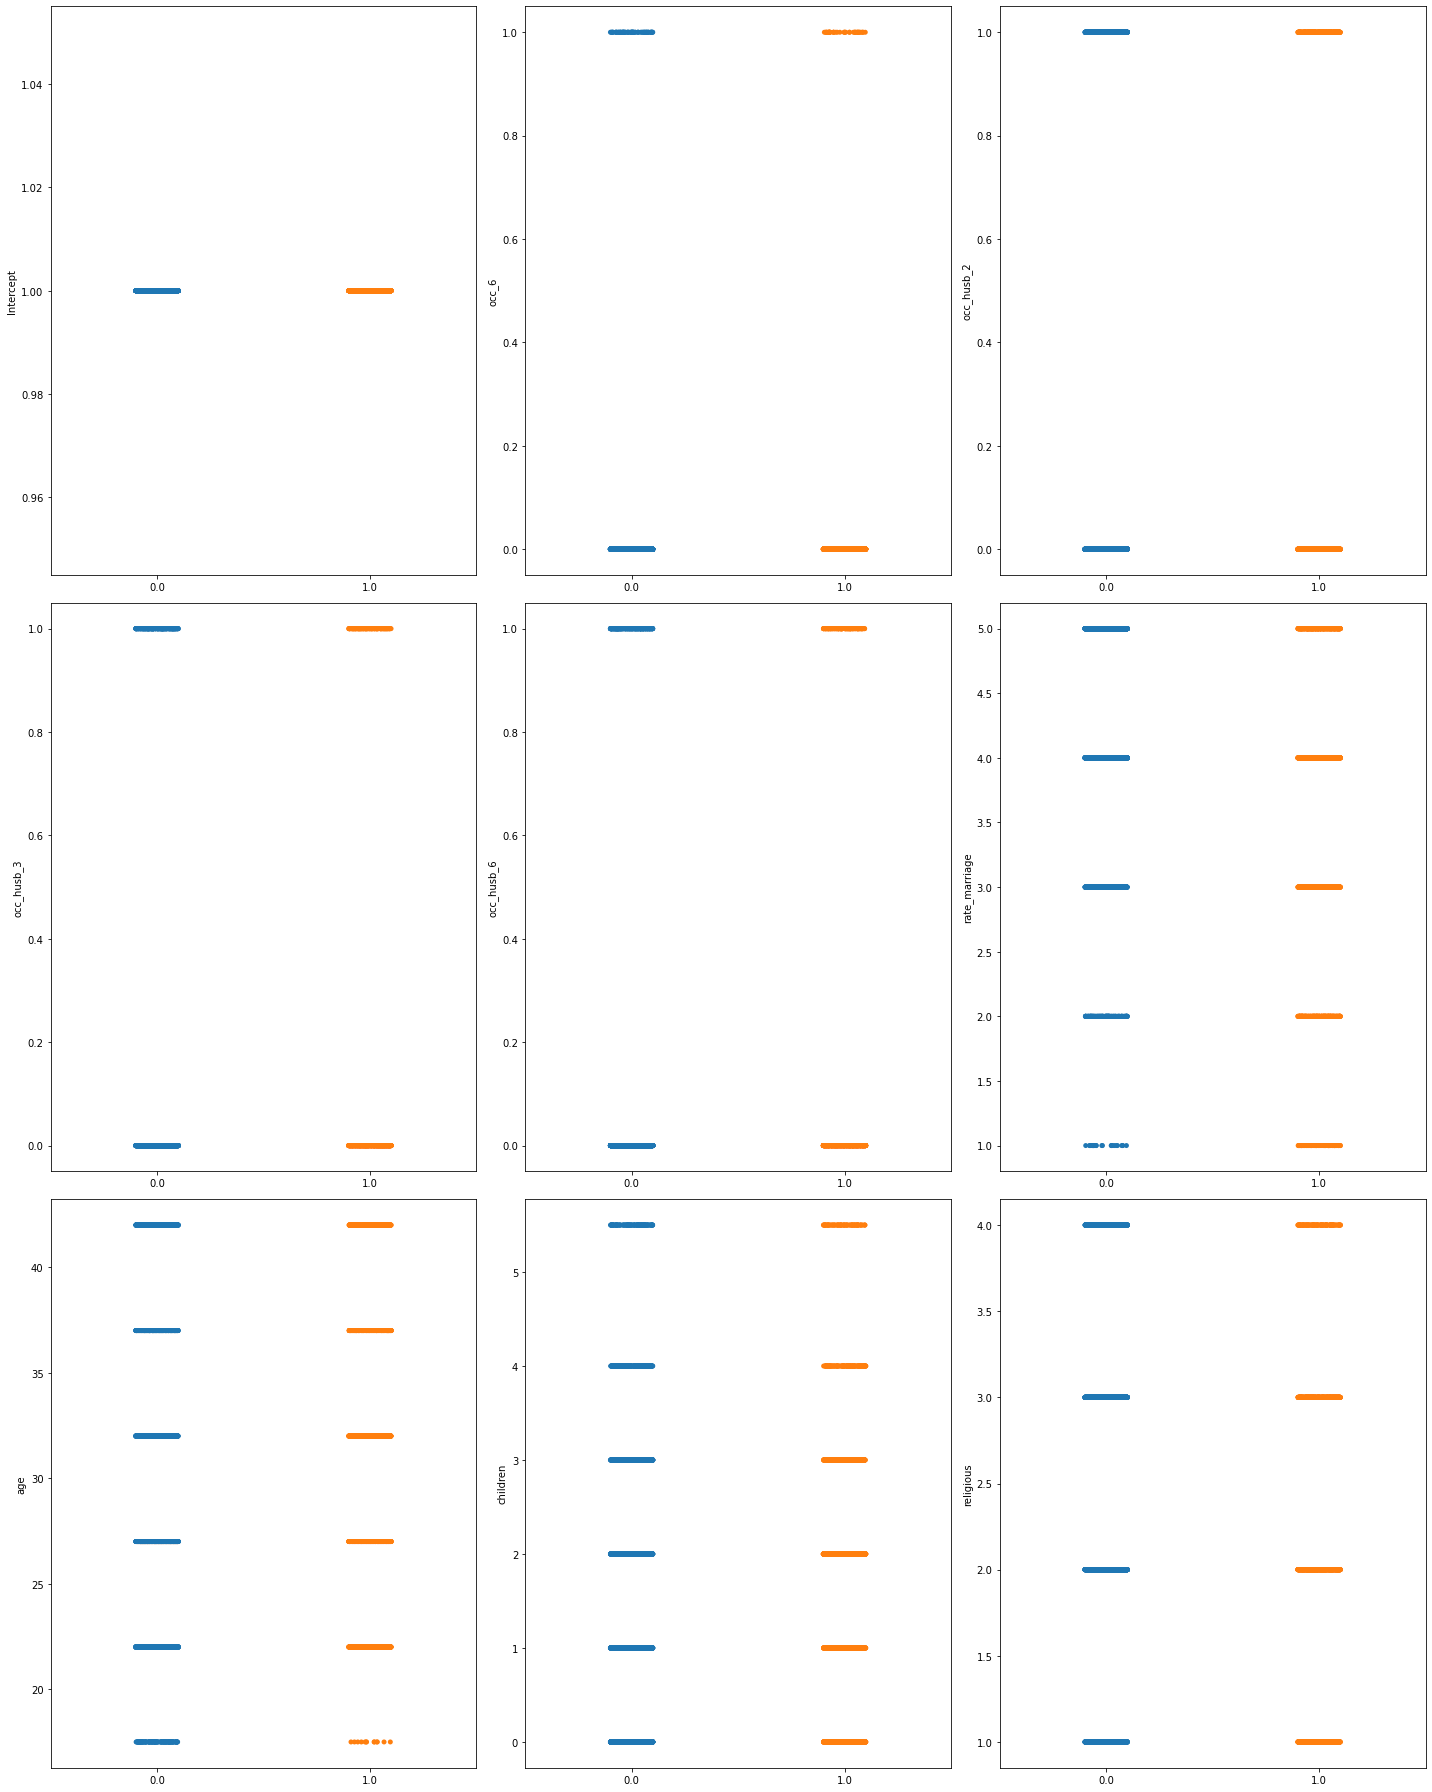

In [378]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

Text(0, 0.5, 'Frequency')

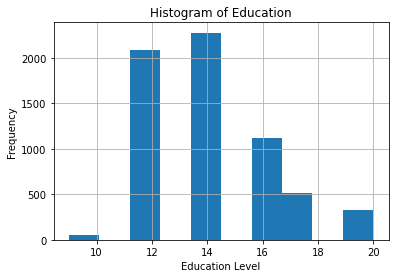

In [356]:
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Scale the data

Text(0, 0.5, 'Frequency')

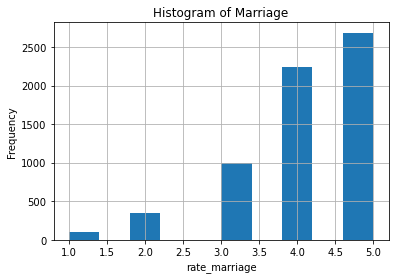

In [357]:
data.rate_marriage.hist()
plt.title('Histogram of Marriage')
plt.xlabel('rate_marriage')
plt.ylabel('Frequency')

<AxesSubplot:>

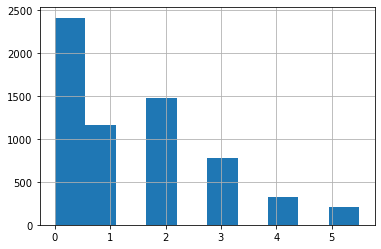

In [358]:
data.children.hist()

In [359]:
X=X.drop(['occ_2','occ_3','occ_4','occ_5','occ_husb_4','occ_husb_5','yrs_married'], axis=1)
X

,Intercept,occ_6,occ_husb_2,occ_husb_3,occ_husb_6,rate_marriage,age,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,3.0,32.0,3.0,3.0,17.0
1,1.0,0.0,0.0,0.0,0.0,3.0,27.0,3.0,1.0,14.0
2,1.0,0.0,0.0,0.0,0.0,4.0,22.0,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,0.0,4.0,37.0,4.0,3.0,16.0
4,1.0,0.0,0.0,0.0,0.0,5.0,27.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,5.0,32.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,0.0,4.0,32.0,1.0,1.0,16.0
6363,1.0,0.0,0.0,0.0,0.0,5.0,22.0,0.0,2.0,14.0
6364,1.0,0.0,0.0,0.0,0.0,5.0,32.0,1.0,3.0,14.0


In [360]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [361]:
#Check the multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,1.089310,occ_6
2,1.076642,occ_husb_2
3,1.040037,occ_husb_3
4,1.120069,occ_husb_6
5,1.035785,rate_marriage
6,1.907249,age
7,1.945549,children
8,1.036866,religious
9,1.167361,educ


In [362]:
#X=X.drop(['occ_2','occ_3','occ_4','occ_5','occ_husb_4','occ_husb_5','yrs_married'], axis=1)

In [363]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [382]:
log_reg = LogisticRegression()

log_reg = log_reg.fit(x_train,y_train)

/home/solomon/miniconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [383]:
log_reg.score(x_train,y_train)

0.7195224130708001

In [384]:
y.mean()

0.3224945020420987

# Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no"

In [385]:
y_pred = log_reg.predict(x_test)
y_pred

array([1., 0., 0., ..., 1., 1., 0.])

In [386]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.707286432160804

In [387]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[972, 112],
       [354, 154]])

In [392]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [393]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.707286432160804

In [394]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8966789667896679

In [395]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7330316742081447

In [396]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8066390041493776

In [397]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5999142865444402

ROC 

In [390]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

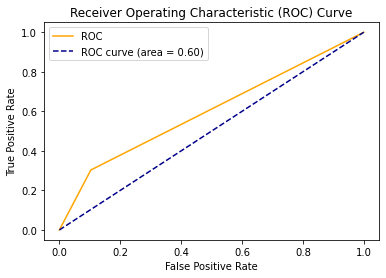

In [391]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()